<a href="https://colab.research.google.com/github/MAHABUB51/MiningApplicationsMLDL/blob/main/Untitled10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset

In [2]:
file_path = '/content/Acid_Mine_Drainage_Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')


# Preprocess the data

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df = pd.get_dummies(df, columns=['Location'], drop_first=True)



# Define features and target

In [4]:
X = df.drop(['Iron Concentration (mg/L)', 'Date'], axis=1)
y = df['Iron Concentration (mg/L)']

# Split data into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model with default parameters

In [6]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Make predictions

In [7]:
y_pred = model.predict(X_test)

# Evaluate the model

In [8]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 22269.281959633892
Mean Absolute Error: 126.47195905380548
R-squared: -0.02205215343424216


#Steps to Improve the Model

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset

In [11]:
file_path = '/content/Acid_Mine_Drainage_Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Preprocess the data

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Define features and target

In [13]:
X = df.drop(['Iron Concentration (mg/L)', 'Date'], axis=1)
y = df['Iron Concentration (mg/L)']

# Feature scaling

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Define the parameter distribution for Random Search

In [18]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model

In [19]:
rf = RandomForestRegressor(random_state=42)

rf = RandomForestRegressor(random_state=42)

# Perform Random Search with cross-validation

In [20]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

# Get the best model from Random Searc

In [21]:
best_rf = random_search.best_estimator_

# Evaluate the best model on the test set

In [22]:
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 21883.251942354207
Mean Absolute Error: 126.13206181114045
R-squared: -0.004335245849789171


#Additional Steps to Improve Model Performance


In [24]:
import numpy as np

# Calculate z-scores of each feature

In [25]:
z_scores = np.abs((X - X.mean()) / X.std())


# Set a threshold for identifying outliers (e.g., z > 3)

In [26]:
threshold = 3
outliers = (z_scores > threshold).any(axis=1)


# Remove outliers

In [27]:
X_no_outliers = X[~outliers]
y_no_outliers = y[~outliers]

# Scale features

In [28]:
scaler = StandardScaler()
X_scaled_no_outliers = scaler.fit_transform(X_no_outliers)

# Split data into training and testing sets

In [29]:
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_scaled_no_outliers, y_no_outliers, test_size=0.2, random_state=42)


# Initialize and train the model

In [30]:
model_no_outliers = RandomForestRegressor(random_state=42)
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

RandomForestRegressor(random_state=42)

# Make predictions

In [31]:
y_pred_no_outliers = model_no_outliers.predict(X_test_no_outliers)

# Evaluate the model

In [32]:
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
mae_no_outliers = mean_absolute_error(y_test_no_outliers, y_pred_no_outliers)
r2_no_outliers = r2_score(y_test_no_outliers, y_pred_no_outliers)

In [33]:
print(f'Mean Squared Error (No Outliers): {mse_no_outliers}')
print(f'Mean Absolute Error (No Outliers): {mae_no_outliers}')
print(f'R-squared (No Outliers): {r2_no_outliers}')


Mean Squared Error (No Outliers): 22249.200181254284
Mean Absolute Error (No Outliers): 131.57634582811926
R-squared (No Outliers): -0.041102550387589476


#Additional Ensemble Model Example

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model

In [35]:
gbr = GradientBoostingRegressor(random_state=42)


# Train the model

In [36]:
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

# Make predictions

In [37]:
y_pred_gbr = gbr.predict(X_test)


# Evaluate the model

In [38]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)


In [39]:
print(f'Mean Squared Error (GBR): {mse_gbr}')
print(f'Mean Absolute Error (GBR): {mae_gbr}')
print(f'R-squared (GBR): {r2_gbr}')

Mean Squared Error (GBR): 22627.531539519223
Mean Absolute Error (GBR): 126.44663028733925
R-squared (GBR): -0.03849407353083145


#Step 1: Feature Selection Using Feature Importance

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = '/content/Acid_Mine_Drainage_Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Define features and target
X = df.drop(['Iron Concentration (mg/L)', 'Date'], axis=1)
y = df['Iron Concentration (mg/L)']

# Initialize the model with default parameters
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Select top features (e.g., top 5)
top_features = feature_importance_df['Feature'].head(5).tolist()
X_selected = X[top_features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#Advanced Feature Engineering and Polynomial Features


In [44]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_selected)

# Scale features
scaler = StandardScaler()
X_scaled_poly = scaler.fit_transform(X_poly)

# Split data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_scaled_poly, y, test_size=0.2, random_state=42)

# Train the Random Forest model again with polynomial features
model_poly = RandomForestRegressor(random_state=42)
model_poly.fit(X_train_poly, y_train_poly)

# Make predictions
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

print(f'Mean Squared Error (Polynomial Features): {mse_poly}')
print(f'Mean Absolute Error (Polynomial Features): {mae_poly}')
print(f'R-squared (Polynomial Features): {r2_poly}')


Mean Squared Error (Polynomial Features): 23092.718541235947
Mean Absolute Error (Polynomial Features): 128.14262850980927
R-squared (Polynomial Features): -0.0598439032072442


 #Trying XGBoost

In [45]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Train the model with polynomial features
xgb_model.fit(X_train_poly, y_train_poly)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_poly)

# Evaluate the model
mse_xgb = mean_squared_error(y_test_poly, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test_poly, y_pred_xgb)
r2_xgb = r2_score(y_test_poly, y_pred_xgb)

print(f'Mean Squared Error (XGBoost): {mse_xgb}')
print(f'Mean Absolute Error (XGBoost): {mae_xgb}')
print(f'R-squared (XGBoost): {r2_xgb}')


Mean Squared Error (XGBoost): 26213.694608730817
Mean Absolute Error (XGBoost): 135.1189748774045
R-squared (XGBoost): -0.2030815844392575


Step 1: Data Analysis and Transformation

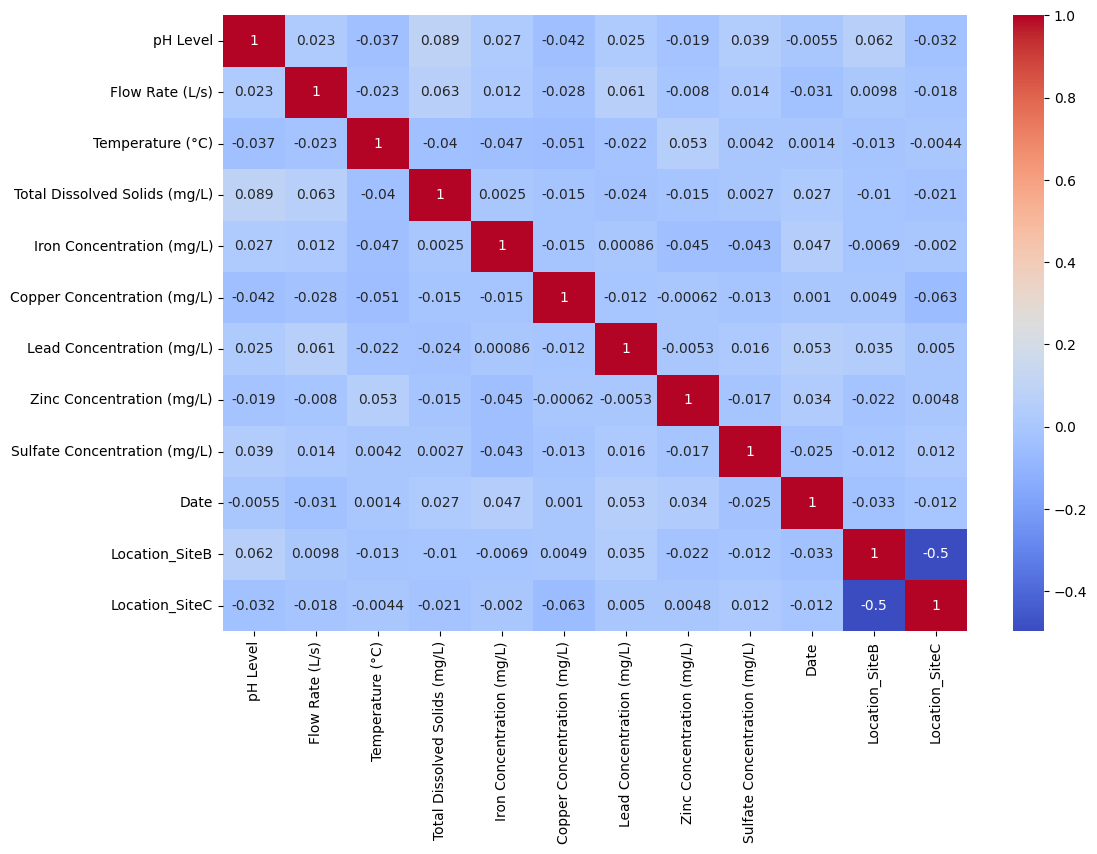

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Acid_Mine_Drainage_Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Define features and target
X = df.drop(['Iron Concentration (mg/L)', 'Date'], axis=1)
y = df['Iron Concentration (mg/L)']

# Correlation analysis
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Log transformation for skewed features
X_transformed = X.copy()
for col in X.columns:
    if X[col].skew() > 1:
        X_transformed[col] = np.log1p(X[col])

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#Step 2: Train and Evaluate Random Forest

In [47]:
# Initialize and train the Random Forest model
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')
print(f'R-squared (Random Forest): {r2_rf}')


Mean Squared Error (Random Forest): 22237.551050014034
Mean Absolute Error (Random Forest): 126.3952287365984
R-squared (Random Forest): -0.020595858410173307


#Step 3: Hyperparameter Tuning for XGBoost

In [48]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Search
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Perform Random Search with cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Get the best model from Random Search
best_xgb = random_search.best_estimator_

# Make predictions
y_pred_xgb_best = best_xgb.predict(X_test)

# Evaluate the model
mse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
mae_xgb_best = mean_absolute_error(y_test, y_pred_xgb_best)
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)

print(f'Mean Squared Error (Best XGBoost): {mse_xgb_best}')
print(f'Mean Absolute Error (Best XGBoost): {mae_xgb_best}')
print(f'R-squared (Best XGBoost): {r2_xgb_best}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mean Squared Error (Best XGBoost): 22095.035487942354
Mean Absolute Error (Best XGBoost): 127.32571283875393
R-squared (Best XGBoost): -0.014055084559571496


#Implementing Additional Steps
Step 1: Exploratory Data Analysis (EDA)

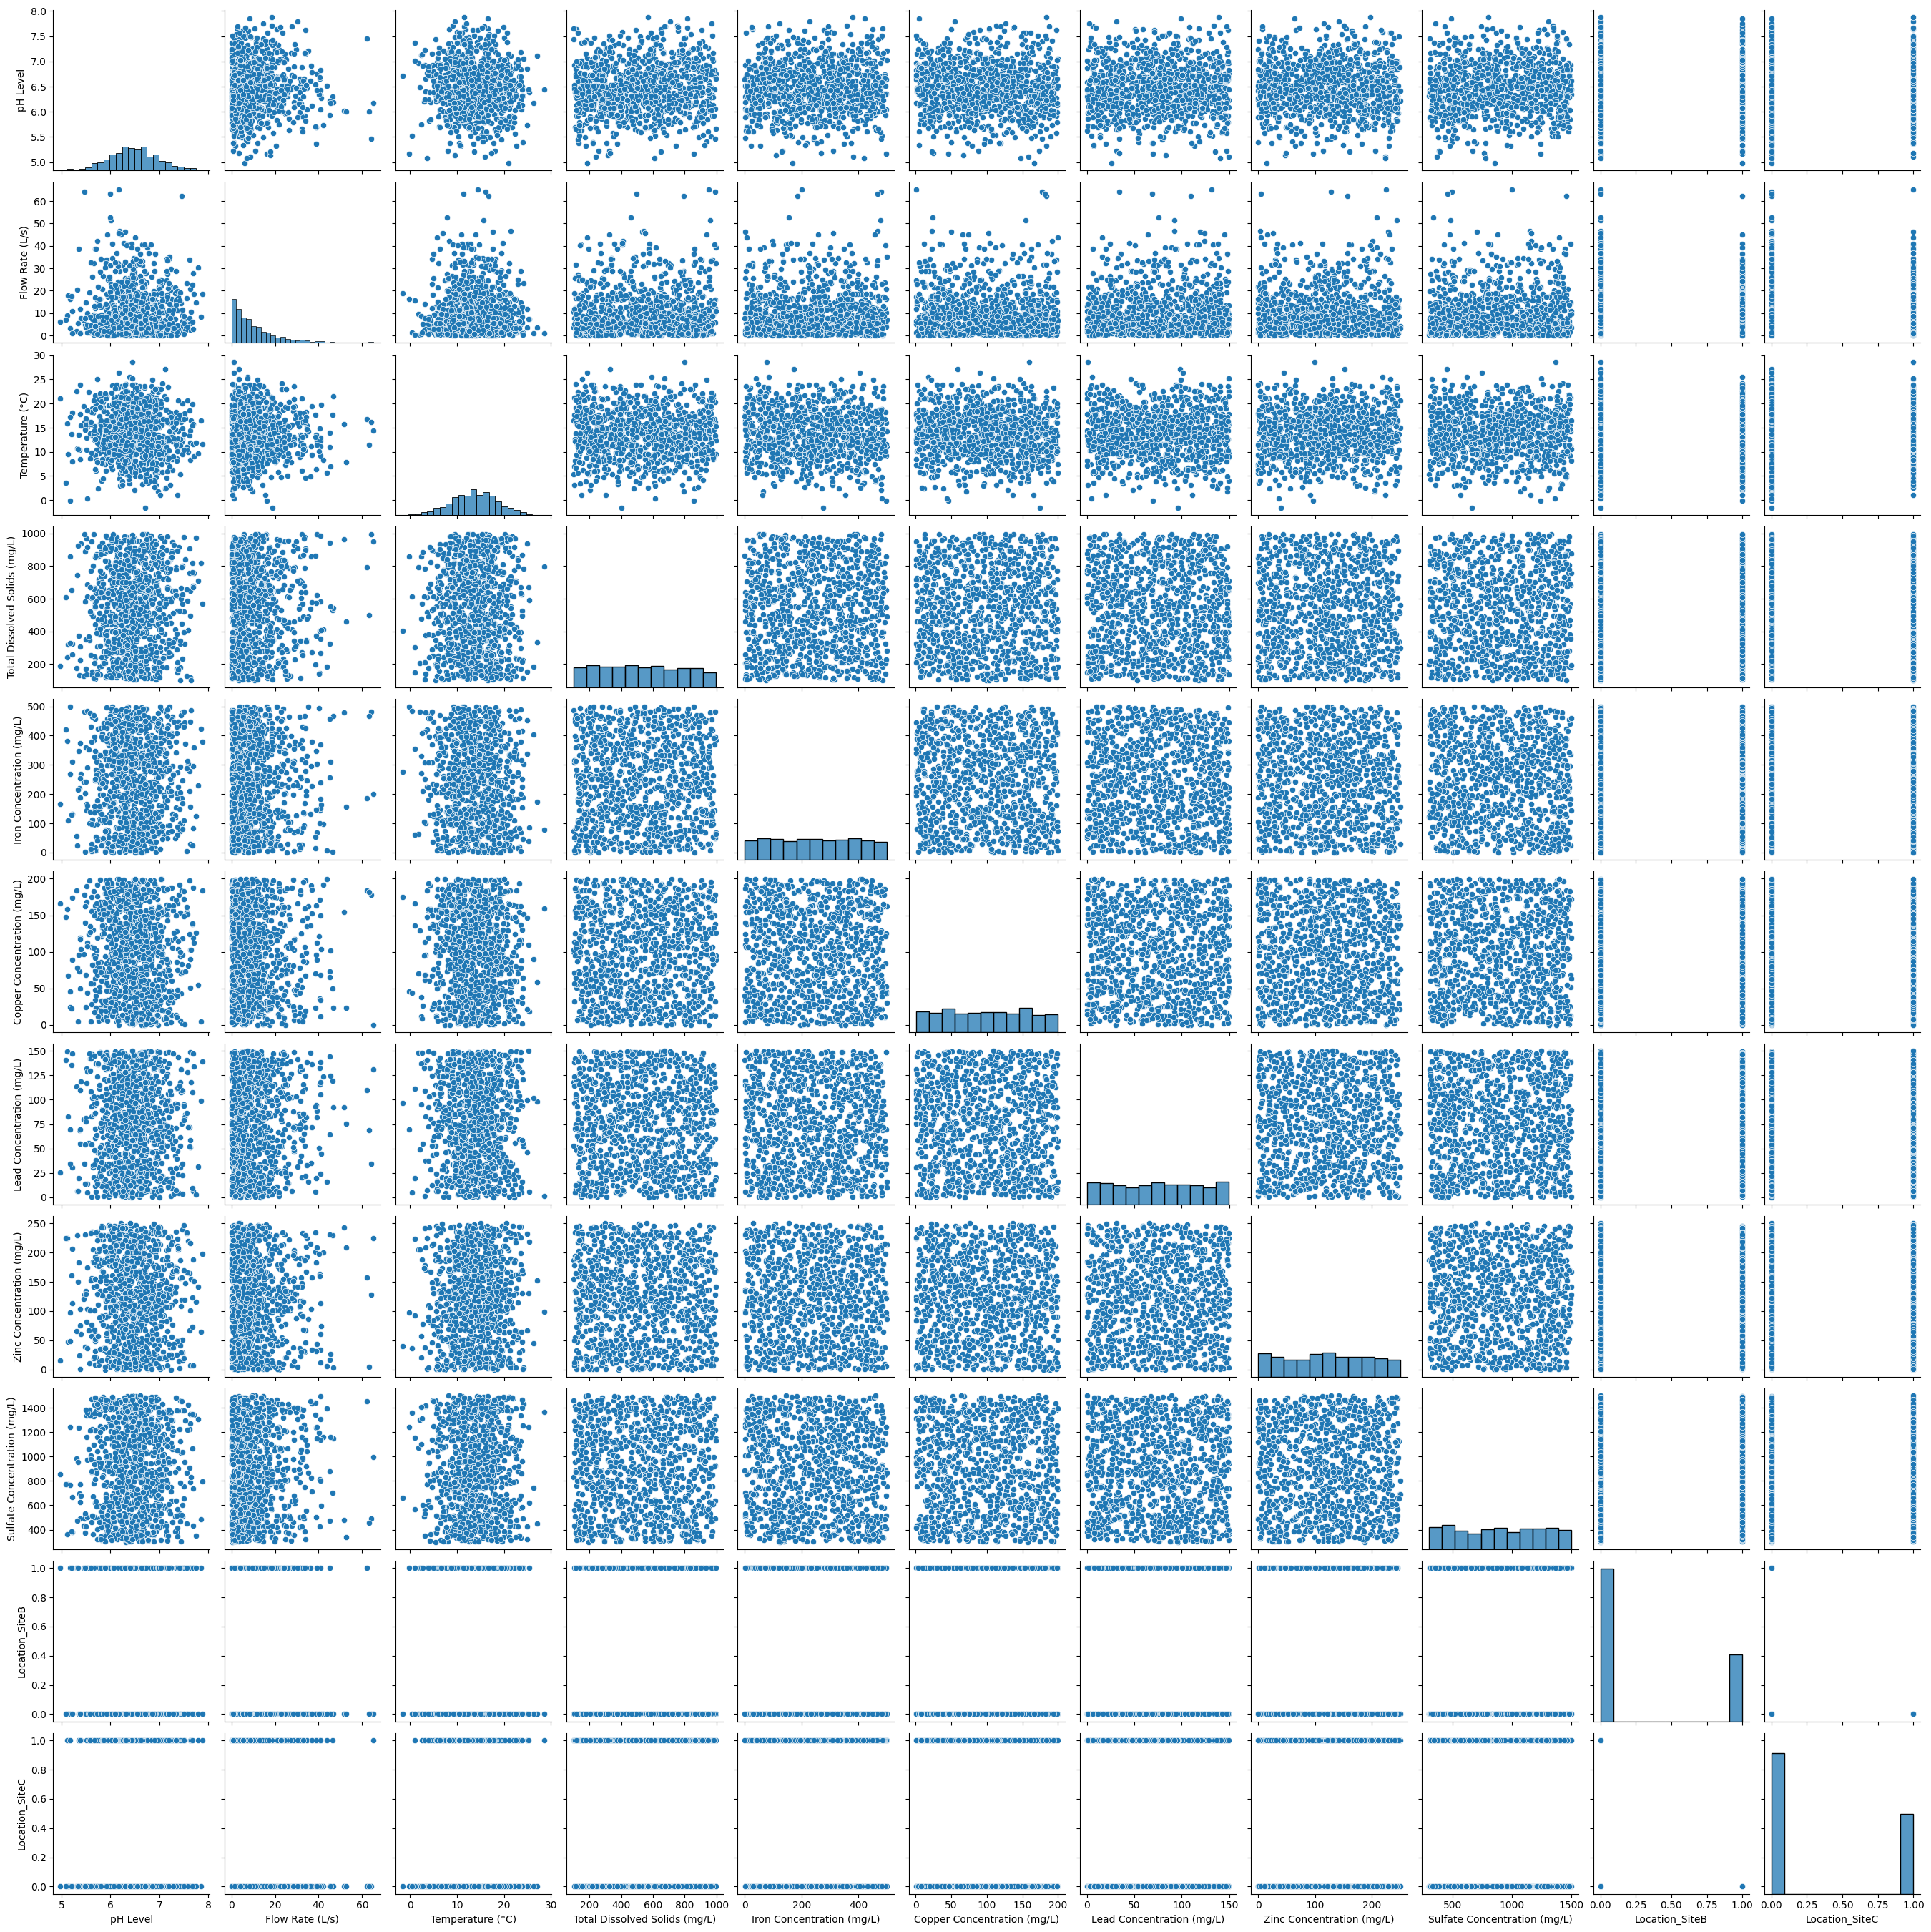

Missing values in each column:
 pH Level                         0
Flow Rate (L/s)                  0
Temperature (°C)                 0
Total Dissolved Solids (mg/L)    0
Iron Concentration (mg/L)        0
Copper Concentration (mg/L)      0
Lead Concentration (mg/L)        0
Zinc Concentration (mg/L)        0
Sulfate Concentration (mg/L)     0
Date                             0
Location_SiteB                   0
Location_SiteC                   0
dtype: int64
Summary Statistics:
           pH Level  Flow Rate (L/s)  Temperature (°C)  \
count  1000.000000      1000.000000       1000.000000   
mean      6.477372        10.470984         13.766770   
min       4.976928         0.000737         -1.584283   
25%       6.150790         3.127803         10.401596   
50%       6.470986         7.511970         13.813024   
75%       6.803475        14.657578         16.993056   
max       7.879678        65.201675         28.645481   
std       0.493764        10.228009          4.798818   



In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)


#Step 2: Create Interaction Terms

In [50]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction terms
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interaction = interaction.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled_interaction = scaler.fit_transform(X_interaction)

# Split data into training and testing sets
X_train_interaction, X_test_interaction, y_train_interaction, y_test_interaction = train_test_split(X_scaled_interaction, y, test_size=0.2, random_state=42)


#Step 3: Neural Networks

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the Neural Network model
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train_interaction.shape[1], activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(1))

# Compile the model
model_nn.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model_nn.fit(X_train_interaction, y_train_interaction, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_nn = model_nn.predict(X_test_interaction)
mse_nn = mean_squared_error(y_test_interaction, y_pred_nn)
mae_nn = mean_absolute_error(y_test_interaction, y_pred_nn)
r2_nn = r2_score(y_test_interaction, y_pred_nn)

print(f'Mean Squared Error (Neural Network): {mse_nn}')
print(f'Mean Absolute Error (Neural Network): {mae_nn}')
print(f'R-squared (Neural Network): {r2_nn}')


Epoch 1/100
20/20 [==============================] - 2s 20ms/step - loss: 80733.7188 - val_loss: 73574.6484
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 79539.0469 - val_loss: 72184.1641
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 77528.2734 - val_loss: 69787.4375
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 74101.9297 - val_loss: 65661.1250
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 68471.9688 - val_loss: 59317.8633
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 60579.8359 - val_loss: 50781.1680
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 50389.1328 - val_loss: 41210.5000
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 39872.8359 - val_loss: 32400.9121
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 30753.0527 - val_loss: 26881.9941
Epoch 10/100
20/20 [================

#Step 1: Deep Data Cleaning and Exploration

Missing values in each column:
 pH Level                         0
Flow Rate (L/s)                  0
Temperature (°C)                 0
Total Dissolved Solids (mg/L)    0
Iron Concentration (mg/L)        0
Copper Concentration (mg/L)      0
Lead Concentration (mg/L)        0
Zinc Concentration (mg/L)        0
Sulfate Concentration (mg/L)     0
Date                             0
Location                         0
dtype: int64


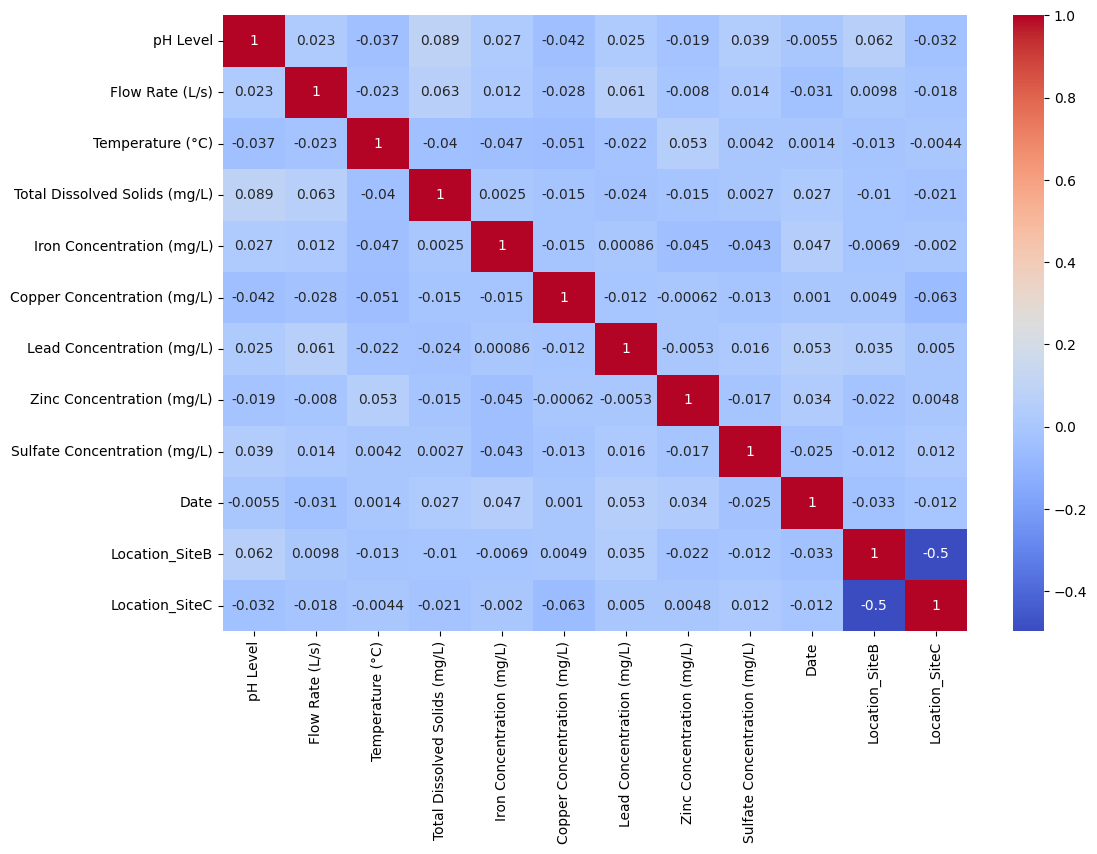

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Acid_Mine_Drainage_Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Re-evaluate the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


#Step 2: Feature Selection with Recursive Feature Elimination (RFE)

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features and target
X = df.drop(['Iron Concentration (mg/L)', 'Date'], axis=1)
y = df['Iron Concentration (mg/L)']

# Perform RFE to select the top features
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

# Print selected features
selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)

# Use only the selected features
X_selected = X[selected_features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Selected Features: Index(['pH Level', 'Flow Rate (L/s)', 'Temperature (°C)', 'Location_SiteB',
       'Location_SiteC'],
      dtype='object')


#Step 3: Hyperparameter Tuning with GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_rf = grid_search.best_estimator_

# Make predictions
y_pred_rf_best = best_rf.predict(X_test)

# Evaluate the model
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
mae_rf_best = mean_absolute_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

print(f'Mean Squared Error (Best RF): {mse_rf_best}')
print(f'Mean Absolute Error (Best RF): {mae_rf_best}')
print(f'R-squared (Best RF): {r2_rf_best}')


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mean Squared Error (Best RF): 21894.31804494613
Mean Absolute Error (Best RF): 127.55291201402115
R-squared (Best RF): -0.004843126346551374


#Implementing Additional Techniques
Step 1: Feature Engineering with Interaction and Polynomial Features

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create interaction and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled_poly = scaler.fit_transform(X_poly)

# Split data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_scaled_poly, y, test_size=0.2, random_state=42)


#Step 2: Stacking Regressors

In [59]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# Define base models
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('svr', SVR())
]

# Define stacking model
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge()
)

# Train the stacking model
stacking_model.fit(X_train_poly, y_train_poly)

# Make predictions
y_pred_stacking = stacking_model.predict(X_test_poly)

# Evaluate the model
mse_stacking = mean_squared_error(y_test_poly, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test_poly, y_pred_stacking)
r2_stacking = r2_score(y_test_poly, y_pred_stacking)

print(f'Mean Squared Error (Stacking): {mse_stacking}')
print(f'Mean Absolute Error (Stacking): {mae_stacking}')
print(f'R-squared (Stacking): {r2_stacking}')


Mean Squared Error (Stacking): 22020.91070108394
Mean Absolute Error (Stacking): 127.11069566642733
R-squared (Stacking): -0.0106531159568648


Step 3: Bayesian Optimization for Hyperparameter Tuning

In [61]:
!pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.6 MB/s eta 0:00:00


In [62]:
from skopt import BayesSearchCV

# Define the parameter grid for Bayesian Optimization
param_grid_bayes = {
    'n_estimators': (50, 200),
    'max_features': ['auto', 'sqrt'],
    'max_depth': (10, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

# Initialize the Random Forest model
rf_model_bayes = RandomForestRegressor(random_state=42)

# Perform Bayesian Optimization with cross-validation
bayes_search = BayesSearchCV(estimator=rf_model_bayes, search_spaces=param_grid_bayes, n_iter=32, cv=5, n_jobs=-1, random_state=42, verbose=2)
bayes_search.fit(X_train_poly, y_train_poly)

# Get the best model from Bayesian Optimization
best_rf_bayes = bayes_search.best_estimator_

# Make predictions
y_pred_rf_bayes = best_rf_bayes.predict(X_test_poly)

# Evaluate the model
mse_rf_bayes = mean_squared_error(y_test_poly, y_pred_rf_bayes)
mae_rf_bayes = mean_absolute_error(y_test_poly, y_pred_rf_bayes)
r2_rf_bayes = r2_score(y_test_poly, y_pred_rf_bayes)

print(f'Mean Squared Error (Best RF - Bayesian): {mse_rf_bayes}')
print(f'Mean Absolute Error (Best RF - Bayesian): {mae_rf_bayes}')
print(f'R-squared (Best RF - Bayesian): {r2_rf_bayes}')


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

#Implementing Additional Techniques
Step 1: Voting Regressor

In [63]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Initialize base models
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = SVR()
model3 = LinearRegression()

# Create the Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('rf', model1),
    ('svr', model2),
    ('lr', model3)
])

# Train the Voting Regressor
voting_regressor.fit(X_train_poly, y_train_poly)

# Make predictions
y_pred_voting = voting_regressor.predict(X_test_poly)

# Evaluate the model
mse_voting = mean_squared_error(y_test_poly, y_pred_voting)
mae_voting = mean_absolute_error(y_test_poly, y_pred_voting)
r2_voting = r2_score(y_test_poly, y_pred_voting)

print(f'Mean Squared Error (Voting): {mse_voting}')
print(f'Mean Absolute Error (Voting): {mae_voting}')
print(f'R-squared (Voting): {r2_voting}')


Mean Squared Error (Voting): 21206.18216648899
Mean Absolute Error (Voting): 124.14050575015015
R-squared (Voting): 0.02673897664659075


Step 2: Bagging and Boosting

In [64]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor

# Initialize the models
bagging_regressor = BaggingRegressor(base_estimator=RandomForestRegressor(random_state=42), n_estimators=10, random_state=42)
adaboost_regressor = AdaBoostRegressor(base_estimator=RandomForestRegressor(random_state=42), n_estimators=50, random_state=42)
gboost_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train and evaluate Bagging Regressor
bagging_regressor.fit(X_train_poly, y_train_poly)
y_pred_bagging = bagging_regressor.predict(X_test_poly)
mse_bagging = mean_squared_error(y_test_poly, y_pred_bagging)
mae_bagging = mean_absolute_error(y_test_poly, y_pred_bagging)
r2_bagging = r2_score(y_test_poly, y_pred_bagging)

print(f'Mean Squared Error (Bagging): {mse_bagging}')
print(f'Mean Absolute Error (Bagging): {mae_bagging}')
print(f'R-squared (Bagging): {r2_bagging}')

# Train and evaluate AdaBoost Regressor
adaboost_regressor.fit(X_train_poly, y_train_poly)
y_pred_adaboost = adaboost_regressor.predict(X_test_poly)
mse_adaboost = mean_squared_error(y_test_poly, y_pred_adaboost)
mae_adaboost = mean_absolute_error(y_test_poly, y_pred_adaboost)
r2_adaboost = r2_score(y_test_poly, y_pred_adaboost)

print(f'Mean Squared Error (AdaBoost): {mse_adaboost}')
print(f'Mean Absolute Error (AdaBoost): {mae_adaboost}')
print(f'R-squared (AdaBoost): {r2_adaboost}')

# Train and evaluate Gradient Boosting Regressor
gboost_regressor.fit(X_train_poly, y_train_poly)
y_pred_gboost = gboost_regressor.predict(X_test_poly)
mse_gboost = mean_squared_error(y_test_poly, y_pred_gboost)
mae_gboost = mean_absolute_error(y_test_poly, y_pred_gboost)
r2_gboost = r2_score(y_test_poly, y_pred_gboost)

print(f'Mean Squared Error (Gradient Boosting): {mse_gboost}')
print(f'Mean Absolute Error (Gradient Boosting): {mae_gboost}')
print(f'R-squared (Gradient Boosting): {r2_gboost}')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error (Bagging): 21400.551246171064
Mean Absolute Error (Bagging): 124.23614930450483
R-squared (Bagging): 0.017818377553625697


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error (AdaBoost): 22107.65142589041
Mean Absolute Error (AdaBoost): 125.40374510361308
R-squared (AdaBoost): -0.014634094990656488
Mean Squared Error (Gradient Boosting): 23109.337759791768
Mean Absolute Error (Gradient Boosting): 128.10534158885622
R-squared (Gradient Boosting): -0.06060664482343814


Implementation of Stacking Regressors

In [65]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

# Initialize base models
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model2 = SVR()
model3 = Ridge()

# Create the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('rf', model1),
        ('svr', model2),
        ('ridge', model3)
    ],
    final_estimator=Ridge()
)

# Train the Stacking Regressor
stacking_regressor.fit(X_train_poly, y_train_poly)

# Make predictions
y_pred_stacking = stacking_regressor.predict(X_test_poly)

# Evaluate the model
mse_stacking = mean_squared_error(y_test_poly, y_pred_stacking)
mae_stacking = mean_absolute_error(y_test_poly, y_pred_stacking)
r2_stacking = r2_score(y_test_poly, y_pred_stacking)

print(f'Mean Squared Error (Stacking): {mse_stacking}')
print(f'Mean Absolute Error (Stacking): {mae_stacking}')
print(f'R-squared (Stacking): {r2_stacking}')


Mean Squared Error (Stacking): 22334.10384303917
Mean Absolute Error (Stacking): 128.24102935802128
R-squared (Stacking): -0.02502716383844472


Implementation of Advanced Feature Engineering and PCA
Step 1: Generate Higher-Degree Polynomial Features and Interaction Terms

In [66]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_selected)

# Scale features
scaler = StandardScaler()
X_scaled_poly = scaler.fit_transform(X_poly)

# Split data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_scaled_poly, y, test_size=0.2, random_state=42)


Step 2: Apply PCA for Dimensionality Reduction

In [67]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_poly)
X_test_pca = pca.transform(X_test_poly)


Step 3: Train and Evaluate Lasso and Ridge Regression

In [68]:
from sklearn.linear_model import Lasso, Ridge

# Initialize and train Lasso Regression
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_pca, y_train_poly)
y_pred_lasso = lasso_model.predict(X_test_pca)

# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test_poly, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test_poly, y_pred_lasso)
r2_lasso = r2_score(y_test_poly, y_pred_lasso)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'Mean Absolute Error (Lasso): {mae_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')

# Initialize and train Ridge Regression
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_pca, y_train_poly)
y_pred_ridge = ridge_model.predict(X_test_pca)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test_poly, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test_poly, y_pred_ridge)
r2_ridge = r2_score(y_test_poly, y_pred_ridge)

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'Mean Absolute Error (Ridge): {mae_ridge}')
print(f'R-squared (Ridge): {r2_ridge}')


Mean Squared Error (Lasso): 21920.35289859576
Mean Absolute Error (Lasso): 127.2912823952088
R-squared (Lasso): -0.006037999997403176
Mean Squared Error (Ridge): 21913.42423901916
Mean Absolute Error (Ridge): 127.28566916432779
R-squared (Ridge): -0.00572000809027684


Implementation of Advanced Techniques
Step 1: Recursive Feature Elimination with Cross-Validation

In [69]:
from sklearn.feature_selection import RFECV

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Perform Recursive Feature Elimination with Cross-Validation
rfecv = RFECV(estimator=rf_model, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X, y)

# Get the selected features
selected_features = X.columns[rfecv.support_]
print("Selected Features:", selected_features)

# Use only the selected features
X_selected = X[selected_features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Selected Features: Index(['pH Level', 'Flow Rate (L/s)', 'Temperature (°C)',
       'Total Dissolved Solids (mg/L)', 'Copper Concentration (mg/L)',
       'Lead Concentration (mg/L)', 'Zinc Concentration (mg/L)',
       'Sulfate Concentration (mg/L)', 'Location_SiteB'],
      dtype='object')


Step 2: Hyperparameter Optimization with Grid Search

In [70]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_rf = grid_search.best_estimator_

# Make predictions
y_pred_rf_best = best_rf.predict(X_test)

# Evaluate the model
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
mae_rf_best = mean_absolute_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

print(f'Mean Squared Error (Best RF): {mse_rf_best}')
print(f'Mean Absolute Error (Best RF): {mae_rf_best}')
print(f'R-squared (Best RF): {r2_rf_best}')


Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mean Squared Error (Best RF): 21642.326857696185
Mean Absolute Error (Best RF): 124.84047703709236
R-squared (Best RF): 0.006722048320602081


Step 3: Training a Deep Learning Model

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the Neural Network model
model_nn = Sequential()
model_nn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1))

# Compile the model
model_nn.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model_nn.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_nn = model_nn.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Mean Squared Error (Neural Network): {mse_nn}')
print(f'Mean Absolute Error (Neural Network): {mae_nn}')
print(f'R-squared (Neural Network): {r2_nn}')


Epoch 1/100
20/20 [==============================] - 6s 27ms/step - loss: 80739.4531 - val_loss: 73421.3125
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 78601.0703 - val_loss: 70025.4766
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 72168.5391 - val_loss: 60478.9922
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 56749.5820 - val_loss: 42508.2109
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 34610.2539 - val_loss: 25844.2695
Epoch 6/100
20/20 [==============================] - 0s 15ms/step - loss: 22144.7227 - val_loss: 25718.9844
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 21355.3125 - val_loss: 24716.3789
Epoch 8/100
20/20 [==============================] - 0s 12ms/step - loss: 21225.6641 - val_loss: 24375.7949
Epoch 9/100
20/20 [==============================] - 0s 11ms/step - loss: 20102.7617 - val_loss: 24375.9258
Epoch 10/100
20/20 [============

Step 4: Using Advanced Boosting Algorithms

In [72]:
import lightgbm as lgb

# Initialize the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f'Mean Squared Error (LightGBM): {mse_lgb}')
print(f'Mean Absolute Error (LightGBM): {mae_lgb}')
print(f'R-squared (LightGBM): {r2_lgb}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2043
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] Start training from score 244.800855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 